In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from IPython.core.display import HTML
css=open('style-table.css').read()+open('style-notebook.css').read() 
HTML('<style>()</style>.format(css)')

In [17]:
titles = pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [18]:
cast = pd.read_csv('cast.csv',index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?



In [34]:
superman_batman_films = cast[cast['character'].isin(['Superman', 'Batman'])]
yearly_counts = superman_batman_films.groupby(['year', 'character']).size().unstack(fill_value=0)
superman_years = yearly_counts[yearly_counts['Superman'] > yearly_counts['Batman']]
num_superman_years = len(superman_years)
print(f"Number of Superman Years: {num_superman_years}")

Number of Superman Years: 11


# How many years have been "Batman years", with more Batman characters than Superman characters?



In [35]:
batman_superman_films = cast[cast['character'].isin(['Batman', 'Superman'])]
yearly_counts = batman_superman_films.groupby(['year', 'character']).size().unstack(fill_value=0)
batman_years = yearly_counts[yearly_counts['Batman'] > yearly_counts['Superman']]
num_batman_years = len(batman_years)
print(f"Number of Batman Years: {num_batman_years}")

Number of Batman Years: 27


# Plot the number of actor roles each year and the number of actress roles each year over the history of film.



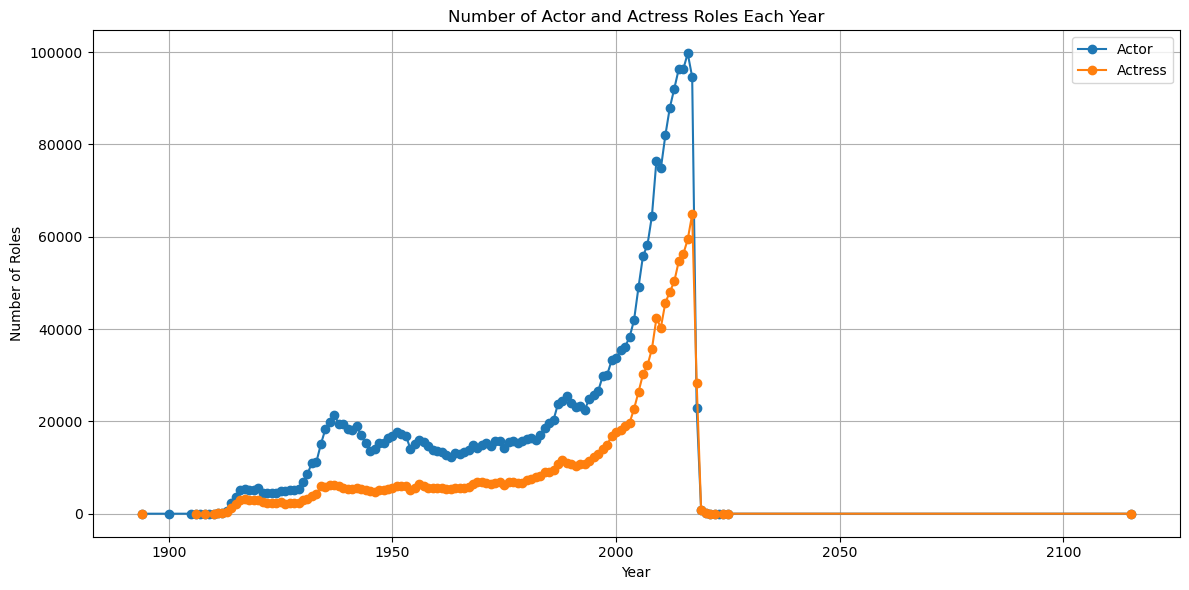

In [36]:
roles_by_year_gender = cast.groupby(['year', 'type'])['character'].count().unstack()
plt.figure(figsize=(12, 6))
plt.plot(roles_by_year_gender.index, roles_by_year_gender['actor'], label='Actor', marker='o')
plt.plot(roles_by_year_gender.index, roles_by_year_gender['actress'], label='Actress', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area'plot.




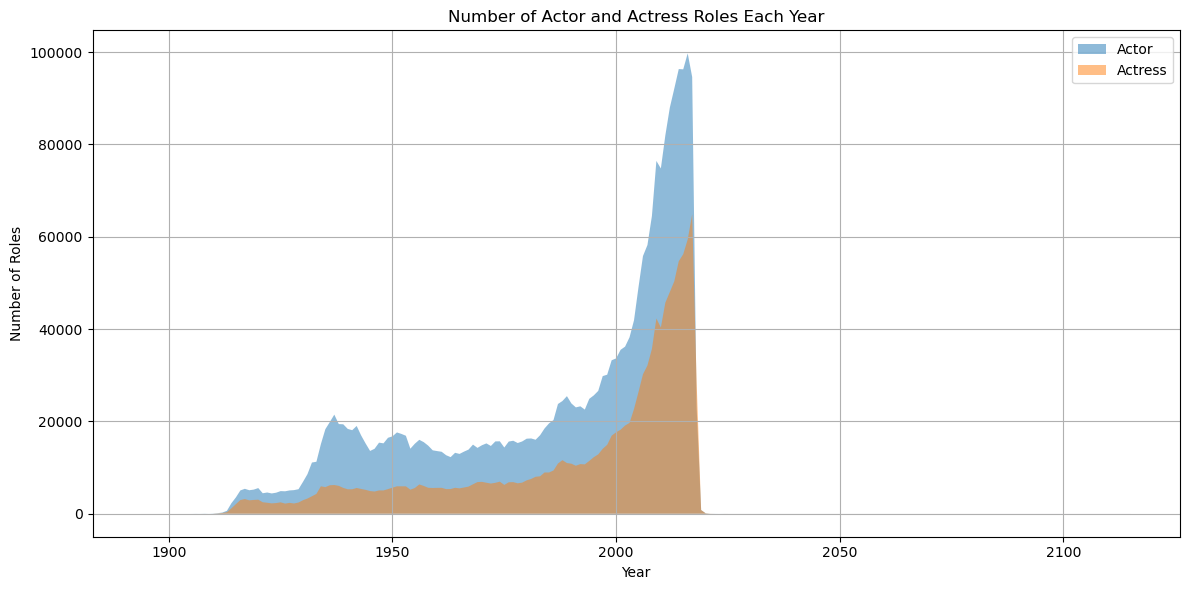

In [37]:
roles_by_year_gender = cast.groupby(['year', 'type'])['character'].count().unstack()
plt.figure(figsize=(12, 6))
plt.fill_between(roles_by_year_gender.index, roles_by_year_gender['actor'], label='Actor', alpha=0.5)
plt.fill_between(roles_by_year_gender.index, roles_by_year_gender['actress'], label='Actress', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.


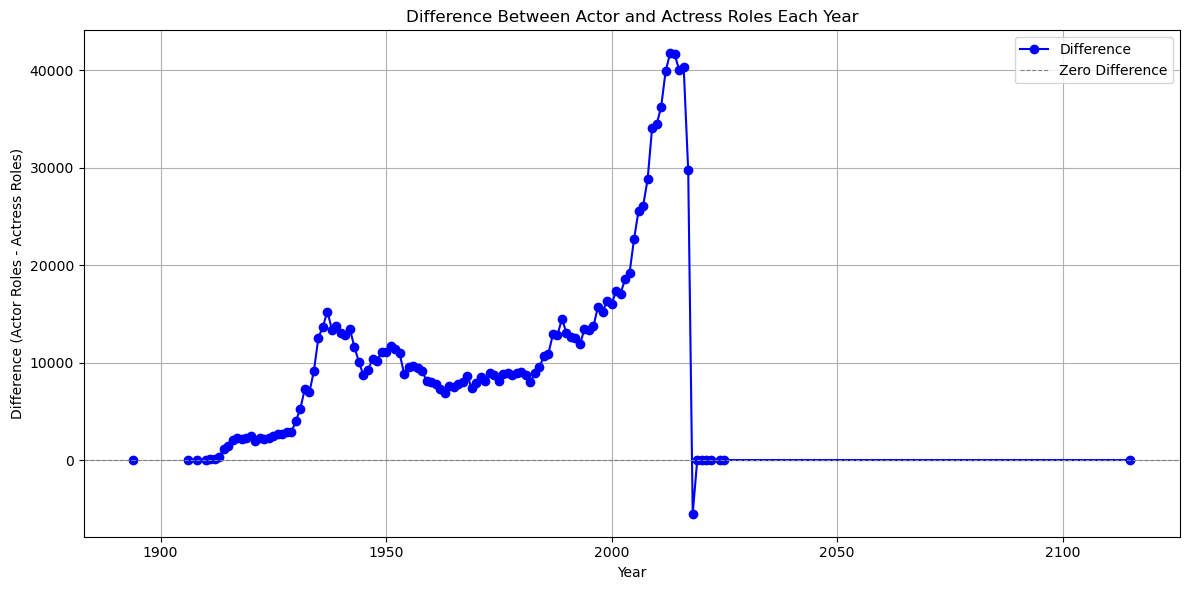

In [38]:
roles_by_year_gender = cast.groupby(['year', 'type'])['character'].count().unstack()
difference = roles_by_year_gender['actor'] - roles_by_year_gender['actress']
plt.figure(figsize=(12, 6))
plt.plot(difference.index, difference, label='Difference', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Difference (Actor Roles - Actress Roles)')
plt.title('Difference Between Actor and Actress Roles Each Year')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Zero Difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot the fraction of roles that have been 'actor' roles each year in the history of film.



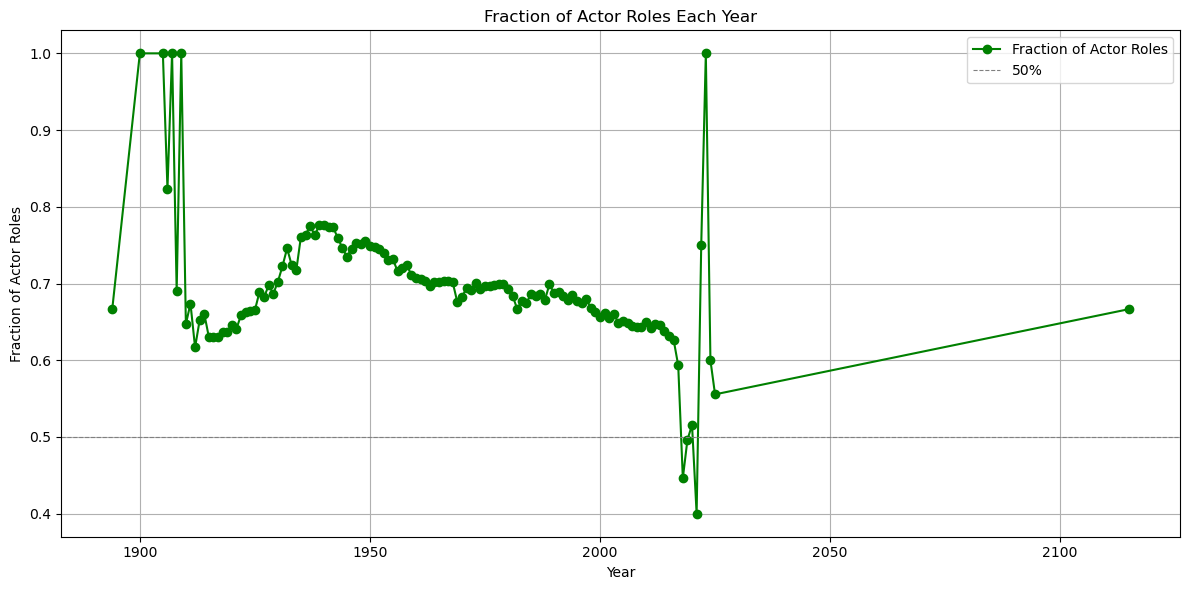

In [39]:
roles_by_year_gender = cast.groupby(['year', 'type'])['character'].count().unstack()
total_roles_each_year = roles_by_year_gender.sum(axis=1)  
actor_roles_each_year = roles_by_year_gender['actor'] 
fraction_actor_roles = actor_roles_each_year / total_roles_each_year
plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_roles.index, fraction_actor_roles, label='Fraction of Actor Roles', marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles Each Year')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8, label='50%')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.


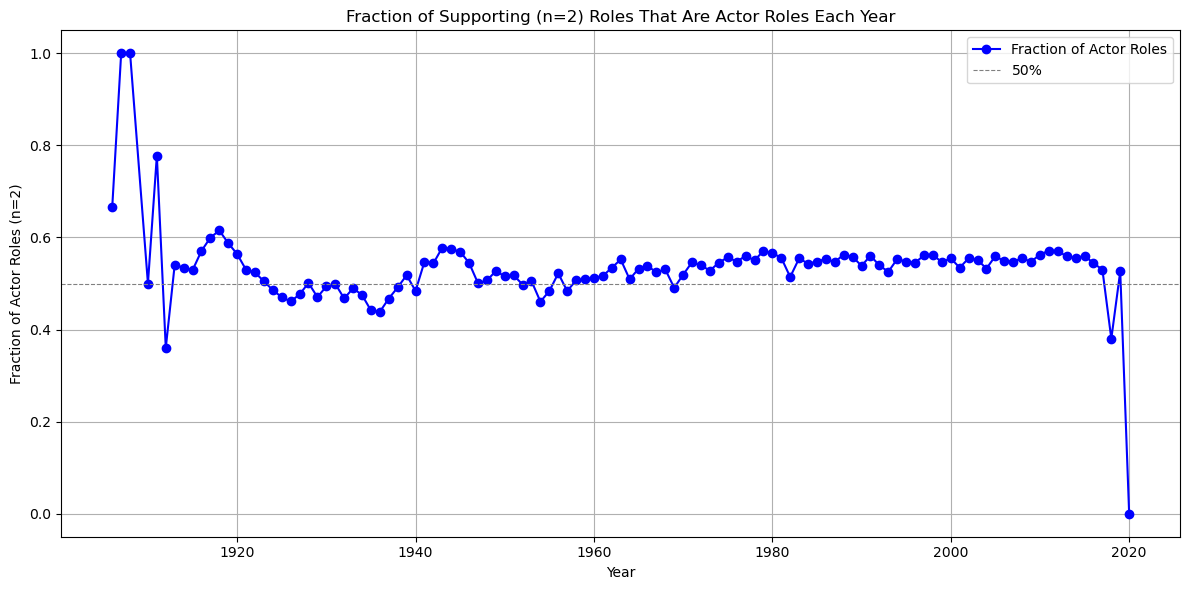

In [40]:
supporting_roles = cast[(cast['n'] == 2)]
roles_by_year_gender = supporting_roles.groupby(['year', 'type'])['character'].count().unstack()
fraction_actor_roles = (roles_by_year_gender['actor'] / roles_by_year_gender.sum(axis=1)).fillna(0)
plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_roles.index, fraction_actor_roles, label='Fraction of Actor Roles', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles (n=2)')
plt.title('Fraction of Supporting (n=2) Roles That Are Actor Roles Each Year')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8, label='50%')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were actor roles for each year in the history of film.

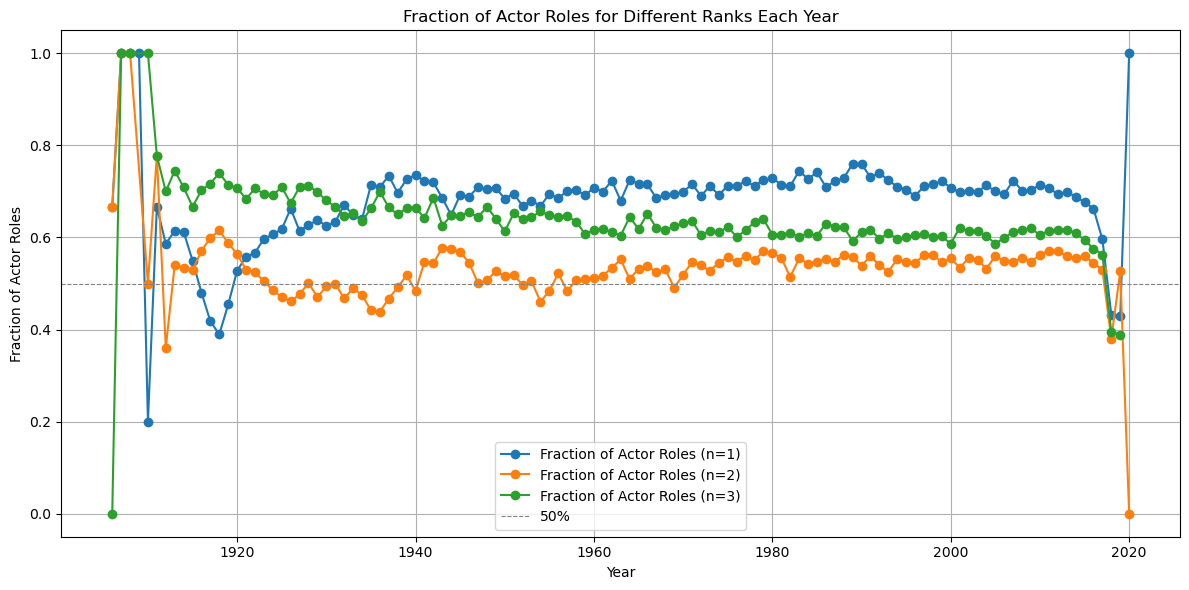

In [41]:
fraction_actor_roles = {}
for n in range(1, 4):
        roles_n = cast[cast['n'] == n]
        roles_by_year_gender = roles_n.groupby(['year', 'type'])['character'].count().unstack()
        fraction_actor_roles[n] = (roles_by_year_gender['actor'] / roles_by_year_gender.sum(axis=1)).fillna(0)
plt.figure(figsize=(12, 6))
for n, fraction in fraction_actor_roles.items():
    plt.plot(fraction.index, fraction, label=f'Fraction of Actor Roles (n={n})', marker='o')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles for Different Ranks Each Year')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8, label='50%')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()
